In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve as fetch


In [2]:
! pip install opendatasets


In [3]:
import opendatasets as od

In [4]:
dataset_url=('https://www.kaggle.com/nowke9/ipldata/version/2?select=deliveries.csv')

In [5]:
od.download(dataset_url)

Skipping, found downloaded files in ".\ipldata" (use force=True to force download)


In [6]:
ipl_df=pd.read_csv("./ipldata/deliveries.csv",index_col=None)

In [7]:
first_match=ipl_df[ipl_df.match_id==1].copy()

In [8]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
ipl_match_df=pd.read_csv("./ipldata/matches.csv")

In [10]:
ipl_match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [11]:
ipl_match_df.season.value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [12]:
def parse_date(date_list):
    for  i, item in enumerate(date_list):
        if '/'  in item :
            list1=item.split('/')
            j=0
            str1=''
            for value in list1[::-1]:
                if j==0:
                    str1+='20'+value+'-'
                    j+=1
                elif j==2:
                    str1+=value
                else:
                    str1+=value+'-'
                    j+=1
            date_list[i]=str1
        
    return date_list
            

In [13]:
date_df=parse_date(ipl_match_df.date)

<ipython-input-12-5036032320ce>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_list[i]=str1


In [14]:
ipl_match_df['date']=date_df

In [15]:
ipl_match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,2019-05-07,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,2019-05-08,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,2019-05-10,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [16]:
ipl_match_df.sort_values("date",inplace=True)

In [17]:
ipl_match_df.index=np.arange(756)

In [18]:
ipl_match_df.head(50)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,66,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
7,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
8,68,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
9,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN


In [19]:
first_match

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,YS Chahal,A Choudhary,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
244,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [61]:
 win08_df=ipl_match_df[ipl_match_df.season==2008].winner.value_counts()

In [66]:
win08_df=win08_df.to_frame()

In [67]:
win08_df


,winner
Rajasthan Royals,13
Kings XI Punjab,10
Chennai Super Kings,9
Delhi Daredevils,7
Mumbai Indians,7
Kolkata Knight Riders,6
Royal Challengers Bangalore,4
Deccan Chargers,2


In [68]:
win08_df['team']=win08_df.index


In [73]:
win08_df.index=range(8)

<BarContainer object of 8 artists>

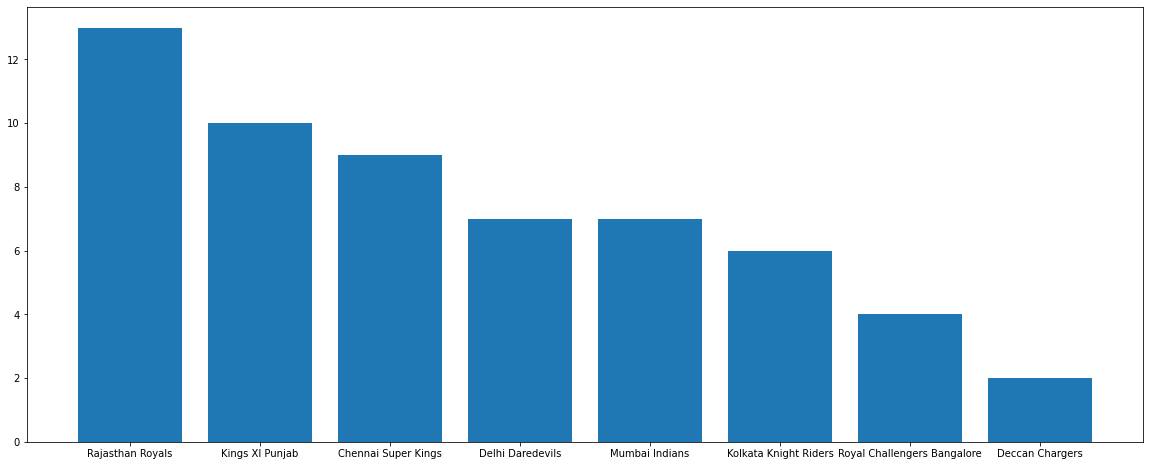

In [74]:
plt.figure(figsize=(20,8))
plt.bar(win08_df.team,win08_df.winner)


Now checking for the 

taking venue as "Eden Gardens" finding which team  won the most no of matches 

In [81]:
eden_df2=ipl_match_df[ipl_match_df.venue=='Eden Gardens'].winner.value_counts()

In [84]:
eden_df2=eden_df2.to_frame()

In [86]:
eden_df2

,winner
Kolkata Knight Riders,45
Mumbai Indians,10
Chennai Super Kings,5
Royal Challengers Bangalore,4
Kings XI Punjab,3
Rajasthan Royals,2
Gujarat Lions,2
Sunrisers Hyderabad,2
Kochi Tuskers Kerala,1
Delhi Daredevils,1


<AxesSubplot:ylabel='winner'>

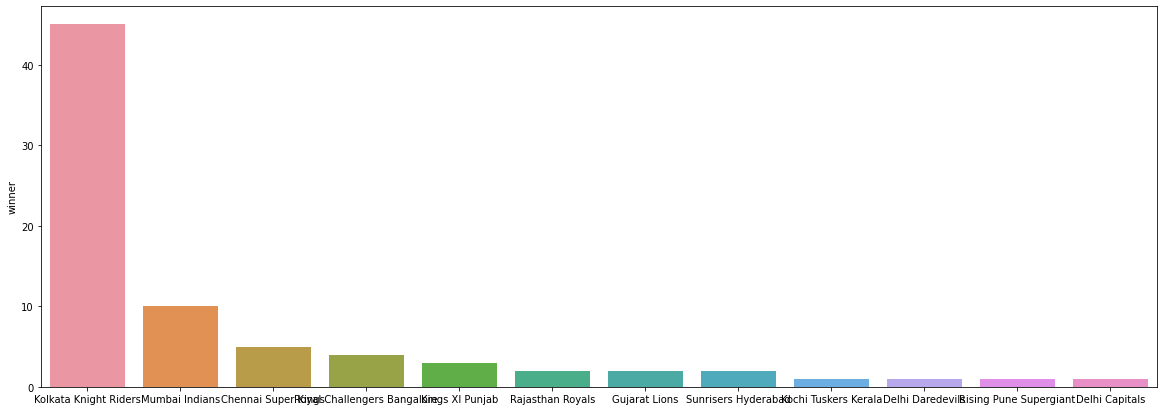

In [92]:
plt.figure(figsize=(20,7))
sns.barplot(x=eden_df2.index,y=eden_df2.winner)

Momentum of mumbai indians in 2019

In [132]:
mumb19_df=ipl_match_df[(ipl_match_df.team1=='Mumbai Indians') | (ipl_match_df.team2=='Mumbai Indians')]

In [133]:
mumb19_df=mumb19_df[mumb19_df.season==2019]

In [134]:
mumb19_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
698,11139,2019,Mumbai,2019-03-24,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
702,11143,2019,Bengaluru,2019-03-28,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,6,0,JJ Bumrah,M. Chinnaswamy Stadium,S Ravi,O Nandan,Yeshwant Barde
704,11145,2019,Mohali,2019-03-30,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,8,MA Agarwal,IS Bindra Stadium,Vineet Kulkarni,Chris Gaffaney,Anil Chaudhary
710,11151,2019,Mumbai,2019-04-03,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,37,0,HH Pandya,Wankhede Stadium,Bruce Oxenford,Rod Tucker,Yeshwant Barde
714,11310,2019,Hyderabad,2019-04-06,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Mumbai Indians,40,0,A Joseph,Rajiv Gandhi Intl. Cricket Stadium,Anil Dandekar,Nitin Menon,Marais Erasmus
719,11315,2019,Mumbai,2019-04-10,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,3,KA Pollard,Wankhede Stadium,Yeshwant Barde,S Ravi,O Nandan
723,11318,2019,Mumbai,2019-04-13,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
726,11322,2019,Mumbai,2019-04-15,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon,Nanda Kishore
729,11325,2019,Delhi,2019-04-18,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford,Anil Chaudhary
731,11327,2019,Jaipur,2019-04-20,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,SPD Smith,Sawai Mansingh Stadium,S Ravi,Yeshwant Barde,O Nandan


In [135]:
mumb19_df.shape

(16, 18)

In [140]:
mum19_df=mumb19_df.winner=='Mumbai Indians' 

In [146]:
mum_cumsum_df=mum19_df.astype(int).cumsum()

In [150]:
mum_cumsum_df.shape

(16,)

TO know about the momenntum of any particular team of wining or losing the game, can be easily reprsented by line graph
we can also comapre the performence of any team over years ,where they lost the momentum

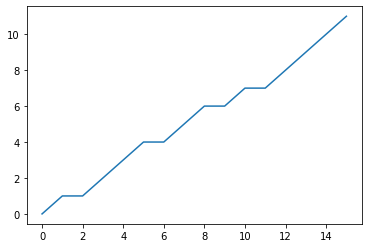

In [151]:
plt.plot(range(16),mum_cumsum_df)

Now coming to the question sections 

In [ ]:
##who won the most player of the match from starting of ipl till now?

In [156]:
ipl_match_df.player_of_match.value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
JD Ryder           1
AD Mascarenhas     1
TM Dilshan         1
MN Samuels         1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

AS shown CH Gayle won the most player of the match

In [ ]:
##Name all the team who lost the game less than 20 runs and howb many  times?

so inorder to find the result we need to first find out the team won the game by less than 20 run

In [175]:
team_df=ipl_match_df[(ipl_match_df.win_by_runs<20) & (ipl_match_df.win_by_runs!=0)]

In [176]:
team_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
14,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
16,76,2008,Delhi,2008-04-30,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
20,111,2008,Bangalore,2008-05-03,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri,NaN
21,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,11326,2019,Kolkata,2019-04-19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
733,11330,2019,Bengaluru,2019-04-21,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,1,0,PA Patel,M. Chinnaswamy Stadium,Vineet Kulkarni,Rod Tucker,Anil Chaudhary
737,11333,2019,Bengaluru,2019-04-24,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,17,0,AB de Villiers,M. Chinnaswamy Stadium,Bruce Oxenford,C Shamshuddin,Rod Tucker
741,11337,2019,Delhi,2019-04-28,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin


In [177]:
def team_looser(winner,team1,team2):
    team_lose=[]
    for x,y in zip(winner,team1):
        if x!=y:
            team_lose.append(x)
        else:
            team_lose.append('false')
    for  i, x in enumerate(team2):
        if team_lose[i]=='false':
            team_lose[i]=x;
    return team_lose
            
        
    

In [179]:
team_lose20=team_looser(team_df.winner,team_df.team1,team_df.team2)

In [181]:
len(team_lose20)

154

In [187]:
team_lose_df=pd.Series(team_lose20)

In [188]:
team_lose_df.value_counts()

Delhi Daredevils               27
Kolkata Knight Riders          22
Royal Challengers Bangalore    18
Mumbai Indians                 15
Kings XI Punjab                15
Rajasthan Royals               14
Chennai Super Kings            12
Deccan Chargers                10
Pune Warriors                   8
Sunrisers Hyderabad             6
Rising Pune Supergiants         3
Rising Pune Supergiant          2
Kochi Tuskers Kerala            1
Delhi Capitals                  1
dtype: int64

so delhi daredevils is the team lost the game by less than 20 runs 27 times